In [500]:
# Libraries

%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
from pylab import *
from numpy.linalg import inv

In [501]:
# Display Functions

def print_layer(board):
    if len(board.shape) == 3:
        for a in range(board.shape[2]):
            print board[:,:,a],'\n'
    elif len(board.shape) == 2:
        print board

def show_layer(board):
    dim1,dim2 = board.shape[0],board.shape[1]
    if len(board.shape) == 3 and board.shape[2] == 4:
        image = np.zeros((dim1,dim2,3))
        image[:,:,0]+=board[:,:,0]
        image[:,:,1]+=board[:,:,1]
        image[:,:,2]+=board[:,:,2]
        image[:,:,0]+=board[:,:,3]
        image[:,:,1]+=board[:,:,3]
    elif len(board.shape) == 3 and board.shape[2] == 1:
        image = np.zeros((dim1,dim2,3))
        image[:,:,0] += board[:,:,0]
        image[:,:,1] += board[:,:,0]
        image[:,:,2] += board[:,:,0]
    elif len(board.shape) == 2:
        image = np.zeros((dim1,dim2,3))
        image[:,:,0] += board
        image[:,:,1] += board
        image[:,:,2] += board
    imgplot = plt.imshow(image)
    show()

In [512]:
# Takes a piece array (e.g. 3,3,4))
# Returns a filter array (e.g. 5,5,4) that can be used to scan a board.

def make_filter(piece_array):
    color = np.amax(np.argmax(piece_array,axis=2))
    piece = np.amax(piece_array,axis=2)
        
    k = np.zeros((4,3,3))
    k[:,1,1]     = -32
    k[color,:,:] = -32
    k[color,0,0] = 1
    k[color,0,2] = 1
    k[color,2,0] = 1
    k[color,2,2] = 1
    
    height, width = piece.shape[0], piece.shape[1]
    x = np.zeros((height+2,width+2))
    x[1:1+height,1:1+width] += piece[:,:]  
    height += 2
    width  += 2
    filter_y,filter_x = k.shape[1],k.shape[2]
    new_y     = height - filter_y + 3
    new_x     = width  - filter_x + 3
    new_filter = np.zeros((new_y,new_x,4))
    temp_y    = np.arange(0,new_y)
    temp_x    = np.arange(0,new_x)
    
    padded = np.zeros((height+2,width+2))
    padded[1:1+height,1:1+width] += x[:,:]
    
    for d in range(len(k)):
        for a in temp_y:
            for b in temp_x:
                new_filter[a,b,d] = np.sum(padded[a:a+filter_y,b:b+filter_x] * k[d])
    return np.minimum(1,np.maximum(-16,new_filter))

blue_piece shape: (2, 3, 4) 

[[ 0.  0.  0.]
 [ 0.  0.  0.]] 

[[ 0.  0.  0.]
 [ 0.  0.  0.]] 

[[ 1.  1.  1.]
 [ 0.  1.  1.]] 

[[ 0.  0.  0.]
 [ 0.  0.  0.]] 



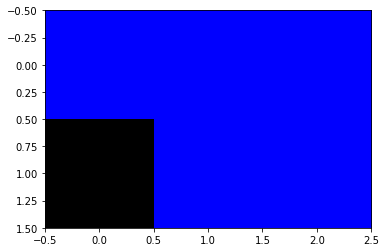


blue_filter shape: (4, 5, 4) 

[[  0.   0.   0.   0.   0.]
 [  0. -16. -16. -16.   0.]
 [  0.   0. -16. -16.   0.]
 [  0.   0.   0.   0.   0.]] 

[[  0.   0.   0.   0.   0.]
 [  0. -16. -16. -16.   0.]
 [  0.   0. -16. -16.   0.]
 [  0.   0.   0.   0.   0.]] 

[[  1. -16. -16. -16.   1.]
 [-16. -16. -16. -16. -16.]
 [  1. -16. -16. -16. -16.]
 [  0.   1. -16. -16.   1.]] 

[[  0.   0.   0.   0.   0.]
 [  0. -16. -16. -16.   0.]
 [  0.   0. -16. -16.   0.]
 [  0.   0.   0.   0.   0.]] 



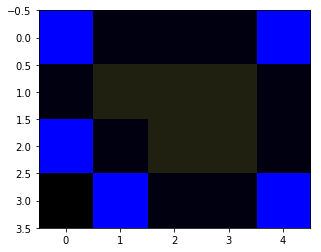

In [511]:
# Running make_filter on a sample piece.

blue_piece = np.zeros((2,3,4))
blue_piece[:,:,2] = 1
blue_piece[1,0,2] = 0

    
print 'blue_piece shape:', blue_piece.shape,'\n'
print_layer(blue_piece)
show_layer(blue_piece)
blue_filter = make_filter(blue_piece)
print '\nblue_filter shape:',blue_filter.shape,'\n'
print_layer(blue_filter)
show_layer(blue_filter)